<a href="https://colab.research.google.com/github/taegeonyu/HDS-5230-07/blob/main/Week10/Week10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage 1

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from google.colab import drive

In [2]:
# mount the drive to access files online
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading all four datasets
first_df = pd.read_csv('/content/drive/MyDrive/SLU/2025 Spring/Week 10/first.csv')
second_df = pd.read_csv('/content/drive/MyDrive/SLU/2025 Spring/Week 10/second.csv')
third_df = pd.read_csv('/content/drive/MyDrive/SLU/2025 Spring/Week 10/third.csv')
fourth_df = pd.read_csv('/content/drive/MyDrive/SLU/2025 Spring/Week 10/first.csv')

In [4]:
def extract_X_Y(df) :
    X = df [["x", "y"]].values
    Y = df ["result"].values
    return X, Y

In [5]:
# function to return model performance on accuracy, precision, and recall
def perf_metrics(model, predictors, target):
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)
  precision = precision_score(target, pred)
  recall = recall_score(target, pred)

  perf = {
      'Accuracy': acc,
      'Precision': precision,
      'Recall': recall
  }
  return perf

In [6]:
# function to split the data, fit the model, and plot visualization on the results
def show_results(X_test, y_test, model, title) :
    pred = model.predict(X_test)
    #plot Training TEST data predictions
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex = 'none', figsize = (16,6))
    f.suptitle(title)

    ax1.scatter(X_test[:, 0], X_test[:, 1], c = y_test, facecolor = 'white', alpha = 0.5)
    ax1.set_xlim(left = -1.0, right = 1.0)
    ax1.set_ylim(bottom = -1.0, top = 1.0)
    ax1.set_title("Test")

    ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred, facecolor='white', alpha=0.5)
    ax2.set_xlim(left = -1.0, right = 1.0)
    ax2.set_ylim(bottom = -1.0, top = 1.0)
    ax2.set_title("Prediction")

    ax3.scatter(X_test[:, 0], X_test[:, 1], c=pred.astype(int) - y_test.astype(int), facecolor='white', alpha=0.5)
    ax3.set_xlim(left = -1.0, right = 1.0)
    ax3.set_ylim(bottom = -1.0, top = 1.0)
    ax3.set_title("Comparison")

In [7]:
# an empty dictionary to store the performance metrics
test_perf_mod = {}

In [8]:
# extract the feature and predictors and split
X, Y = extract_X_Y(first_df)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [9]:
# define and fit the null model
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [10]:
# get performance metrics
test_perf_mod['Dummy Classifier'] = perf_metrics(dummy_clf, X_test, y_test)
print(test_perf_mod['Dummy Classifier'])

{'Accuracy': 0.5275, 'Precision': 0.5204081632653061, 'Recall': 0.5177664974619289}


* All metrics are slightly above random guessing.

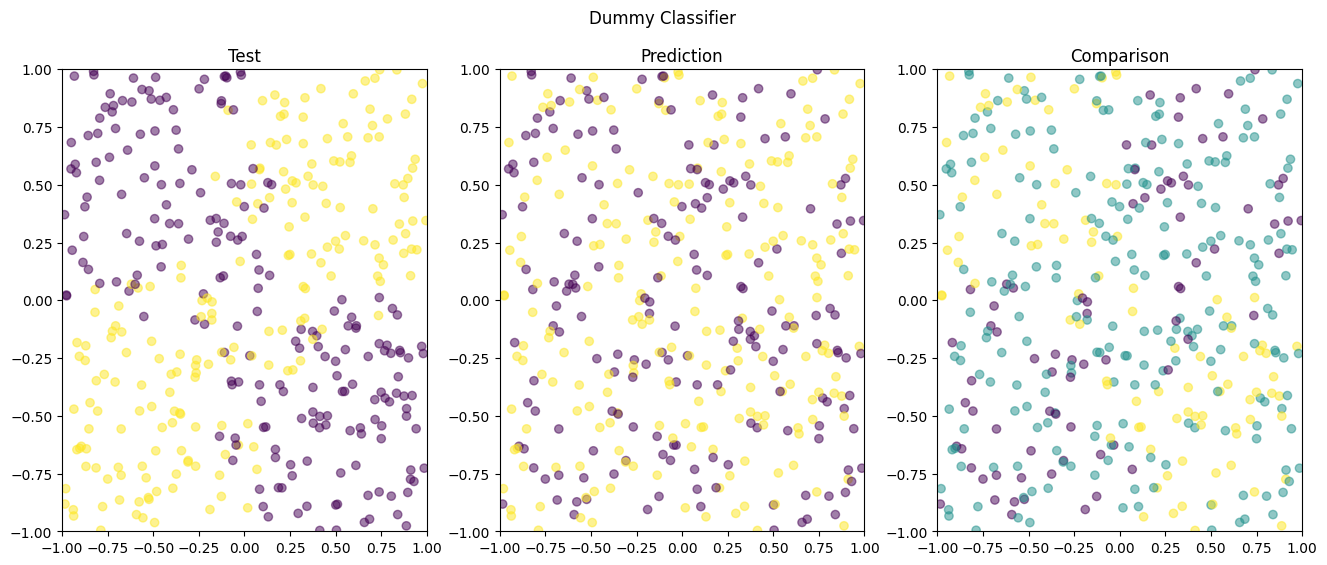

In [11]:
show_results(X_test, y_test, dummy_clf, 'Dummy Classifier')

* The prediction shows no clear pattern, seems like random guessing.

Stage 2

In [12]:
# function to find optimal number of k on accuracy score
def find_optimal_k(X_train, y_train, X_test, y_test):
  k_range = range(1, 21)
  scores = []

  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f'The accuracy score for k = {k} is {score}.')
    scores.append(score)

  print('-' * 50)
  print(f'The optimal number of k is {k_range[np.argmax(scores)]}')
  plt.figure(figsize = (10, 5))
  plt.plot(k_range, scores, marker = 'o')
  plt.xticks(k_range)
  plt.show()

The accuracy score for k = 1 is 0.8525.
The accuracy score for k = 2 is 0.845.
The accuracy score for k = 3 is 0.86.
The accuracy score for k = 4 is 0.8725.
The accuracy score for k = 5 is 0.8775.
The accuracy score for k = 6 is 0.8725.
The accuracy score for k = 7 is 0.88.
The accuracy score for k = 8 is 0.8775.
The accuracy score for k = 9 is 0.8825.
The accuracy score for k = 10 is 0.875.
The accuracy score for k = 11 is 0.8775.
The accuracy score for k = 12 is 0.875.
The accuracy score for k = 13 is 0.8675.
The accuracy score for k = 14 is 0.875.
The accuracy score for k = 15 is 0.865.
The accuracy score for k = 16 is 0.8725.
The accuracy score for k = 17 is 0.875.
The accuracy score for k = 18 is 0.8725.
The accuracy score for k = 19 is 0.875.
The accuracy score for k = 20 is 0.8775.
--------------------------------------------------
The optimal number of k is 9


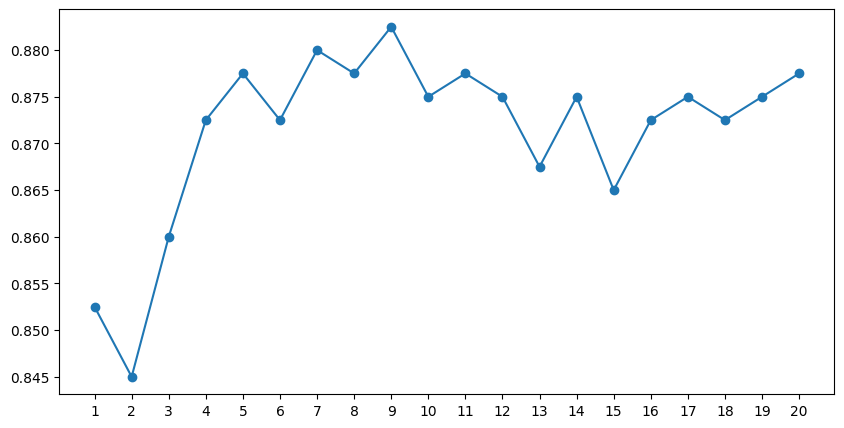

In [13]:
find_optimal_k(X_train, y_train, X_test, y_test)

* k = 20 according to the accuracy score.

In [14]:
# define and fit knn model
k = 20
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

# make test predictions
test_perf_mod['KNN-1'] = perf_metrics(knn, X_test, y_test)

In [15]:
# get performance metrics
print(test_perf_mod['KNN-1'])

{'Accuracy': 0.8775, 'Precision': 0.8775510204081632, 'Recall': 0.8730964467005076}


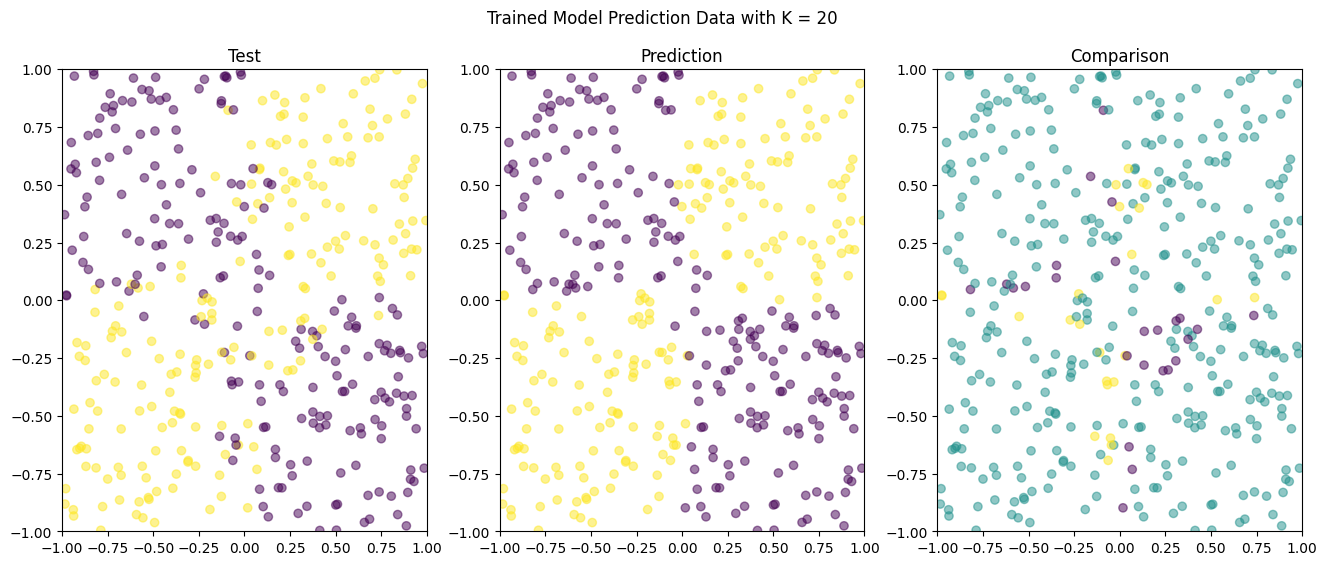

In [16]:
show_results(X_test, y_test, knn, 'Trained Model Prediction Data with K = {}'.format(k))

* The test and prediction seems quite alike, indicating good performance by the model.

Stage 3

In [17]:
# extract the feature and predictors
X, Y = extract_X_Y(second_df)

In [18]:
# make predictions
test_perf_mod['KNN-2'] = perf_metrics(knn, X, Y)

In [19]:
# get performance metrics
print(test_perf_mod['KNN-2'])

{'Accuracy': 0.909, 'Precision': 0.9043824701195219, 'Recall': 0.9134808853118712}


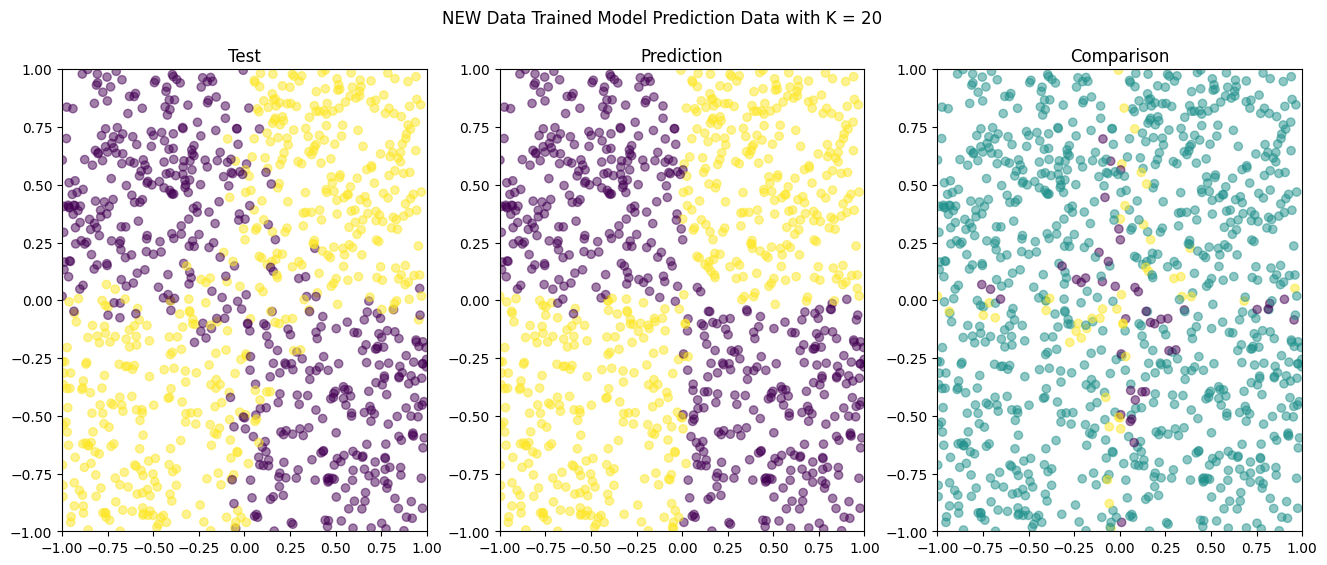

In [20]:
show_results(X, Y, knn, 'NEW Data Trained Model Prediction Data with K = {}'.format(k))

* The test and prediction seems quite alike, indicating good performance by the model.

Stage 4

In [21]:
# extract the feature and predictors and make predictions
X, Y = extract_X_Y(third_df)
test_perf_mod['KNN-3-1'] = perf_metrics(knn, X, Y)

In [53]:
# get performance metrics
print(test_perf_mod['KNN-3-1'])

{'Accuracy': 0.718, 'Precision': 0.41372141372141374, 'Recall': 1.0}


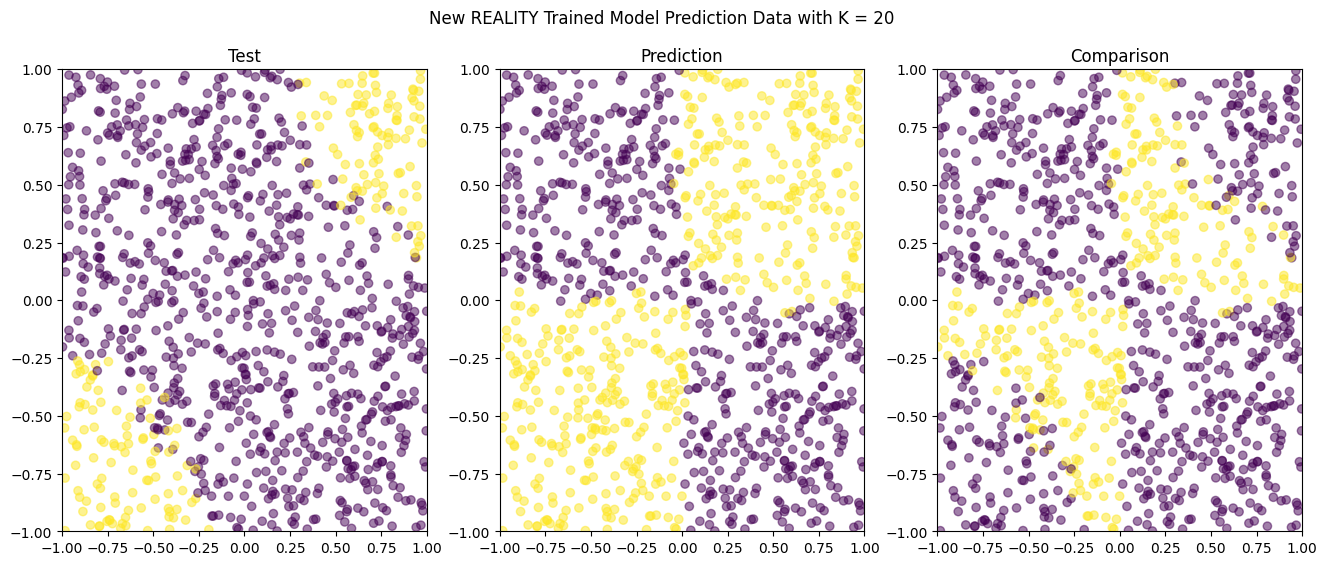

In [22]:
show_results(X, Y, knn, 'New REALITY Trained Model Prediction Data with K = {}'.format(k))

* The true labels and predictions are quite different, indicating poor model performance.
* Now it would be a good time to apply retraining.

In [23]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40)

# define and fit the new model
new_knn = KNeighborsClassifier(n_neighbors = k)
new_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [24]:
# make predictions
test_perf_mod['KNN-3-2'] = perf_metrics(new_knn, X, Y)

In [25]:
# get performance metrics
print(test_perf_mod['KNN-3-2'])

{'Accuracy': 0.962, 'Precision': 0.9214659685863874, 'Recall': 0.8844221105527639}


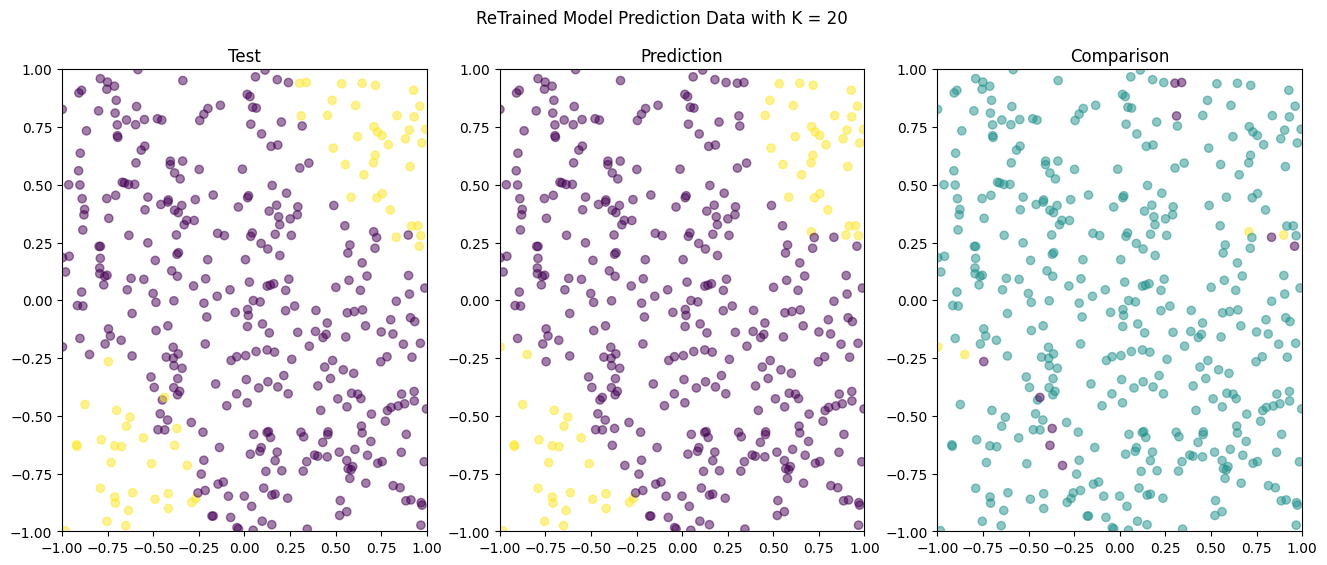

In [26]:
show_results(X_test, y_test, new_knn, 'ReTrained Model Prediction Data with K = {}'.format(k))

* The result looks way better than the previous model, imply that this is the right case to apply retraining.

Stage 5

In [27]:
# extract the feature and predictors
X, Y = extract_X_Y(fourth_df)

In [28]:
# make predictions
test_perf_mod['KNN-4'] = perf_metrics(knn, X, Y)

In [29]:
# get performance metrics
print(test_perf_mod['KNN-4'])

{'Accuracy': 0.903, 'Precision': 0.8972868217054264, 'Recall': 0.9132149901380671}


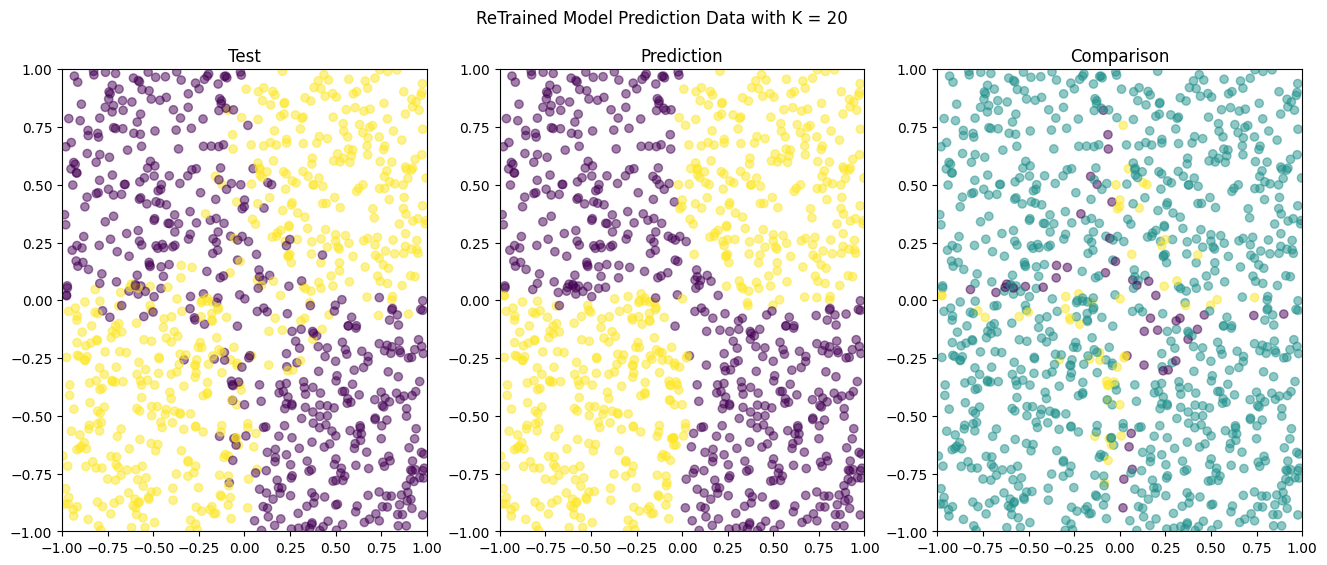

In [30]:
show_results(X, Y,knn, 'ReTrained Model Prediction Data with K = {}'.format(k))

* This one also seems to have a good model performance.

In [47]:
# create dataframe with the model performance
model_comparison_df = pd.DataFrame.from_dict(
    test_perf_mod,
    orient = 'index'
).T

* Instead of 5 segments, I got 6. I think the code in the example note book has over written KNN-2 again.

In [48]:
model_comparison_df

,Dummy Classifier,KNN-1,KNN-2,KNN-3-1,KNN-3-2,KNN-4
Accuracy,0.527500,0.877500,0.909000,0.718000,0.962000,0.903000
Precision,0.520408,0.877551,0.904382,0.413721,0.921466,0.897287
Recall,0.517766,0.873096,0.913481,1.000000,0.884422,0.913215


In [49]:
# specify the columns on data frame
model_comparison_df.columns = ['Dummy', 'KNN Training', 'KNN Prediction', 'KNN Retraining - 1', 'KNN Retraining - 2',
                               'KNN Retrained Prediction']

model_comparison_df

,Dummy,KNN Training,KNN Prediction,KNN Retraining - 1,KNN Retraining - 2,KNN Retrained Prediction
Accuracy,0.527500,0.877500,0.909000,0.718000,0.962000,0.903000
Precision,0.520408,0.877551,0.904382,0.413721,0.921466,0.897287
Recall,0.517766,0.873096,0.913481,1.000000,0.884422,0.913215


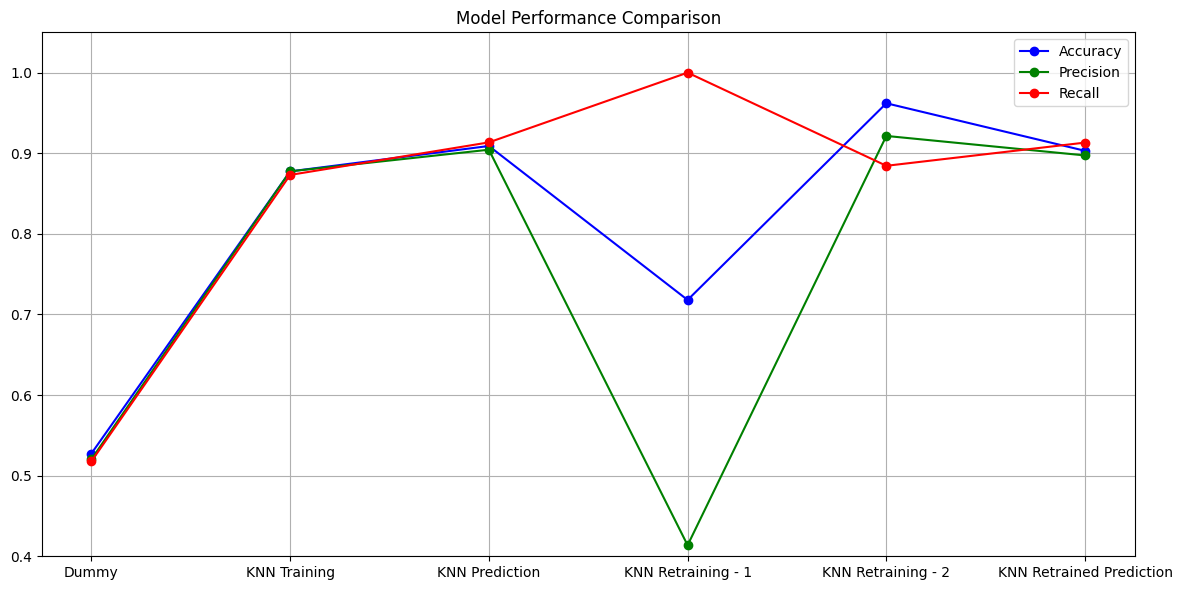

In [52]:
# plot the dataframe
plt.figure(figsize=(12, 6))

colors = {
    'Accuracy': 'blue',
    'Precision': 'green',
    'Recall': 'red'
}

for metric in model_comparison_df.index:
    plt.plot(model_comparison_df.columns, model_comparison_df.loc[metric],
             label = metric, marker = 'o', color = colors[metric])

plt.title('Model Performance Comparison')
plt.ylim(0.4, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

* KNN Retraining - 2 has the highest accuracy and precision score.
* KNN Retrained Prediction has the highest recall score and balanced overall.
* KNN Retraining or KNN Retrained Prediction would be the best models according to this result.